### KNN 

### Table of Contents

* [1. Preparation](#Preparation)
* [2 Model Building](#modelBuilding)
* [3. Training and Evaluation](#training)
    * [Evaluate with only tokenization 1.1](#tokenization)
    * [Evaluate with stopwords removal](#stopwords_removal)
    * [Evaluate with Stemming](#stemming)
    * [Evaluate with lemmatization](#lemmatization)
    * [Evaluate with Upsampling](#upsampling)
    * [All_but_stemming](#All_but_stemming)
    * [Results](#results)
* [4. Hyperparameter optimization](#tunning)
* [3. Deal with imbalanced classes](#imbalanced)

### 1. Preparation <a class="anchor" id="Preparation"></a>

In [9]:
!pip install datasets

Looking in indexes: https://int.repositories.cloud.sap/artifactory/api/pypi/build-releases-pypi/simple, https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/simple

You should consider upgrading via the 'c:\users\d073999\miniconda3\python.exe -m pip install --upgrade pip' command.


In [10]:
!pip install emoji

Looking in indexes: https://int.repositories.cloud.sap/artifactory/api/pypi/build-releases-pypi/simple, https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/simple


You should consider upgrading via the 'c:\users\d073999\miniconda3\python.exe -m pip install --upgrade pip' command.


In [11]:
!pip install mlxtend

Looking in indexes: https://int.repositories.cloud.sap/artifactory/api/pypi/build-releases-pypi/simple, https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/simple

You should consider upgrading via the 'c:\users\d073999\miniconda3\python.exe -m pip install --upgrade pip' command.


In [12]:
# import libraries
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
#from datasets import list_datasets, load_dataset # hugging face dataset
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score

import scipy
import random
import torch
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)

import os
import glob
import sys
#sys.path.append(os.path.dirname((os.path.abspath(''))))

path = "preprocessing.py"

file_name = os.path.abspath(os.path.join(os.path.dirname( 'data'), '..'))
file_name = os.path.abspath(path)
print(file_name)
#from src.data.preprocessing import setup



import sklearn.model_selection as ms
import sklearn.feature_extraction.text as text
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin, TransformerMixin
from sklearn.utils.estimator_checks import check_estimator
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from  sklearn.feature_extraction.text import TfidfTransformer
import emoji
SEED = 1234

from string import punctuation
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from IPython.core.display import HTML



from datasets import list_datasets, load_dataset
from pprint import pprint

from time import time
import logging
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

from tqdm import tqdm
tqdm.pandas()
import warnings
warnings.filterwarnings('ignore')

C:\Users\D073999\Documents\uni-Mannheim\Data_Mining_I\Data_mining\src\models\preprocessing.py


In [13]:
!pip install demoji

Looking in indexes: https://int.repositories.cloud.sap/artifactory/api/pypi/build-releases-pypi/simple, https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/simple

You should consider upgrading via the 'c:\users\d073999\miniconda3\python.exe -m pip install --upgrade pip' command.


In [14]:

# Just in case the file structure does not make the preprocessing available
import string
from xmlrpc.client import Boolean
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import pandas as pd
import numpy as np
from datasets import load_dataset
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.model_selection as ms
from sklearn.utils import resample
import demoji
import re



demoji.download_codes()

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


def setup(rem_stop=True, do_stem=True, do_lem=False, split=True, split_on='preprocessed', upsample=True, do_emojis=True):
    df = load_data();
    df['preprocessed'] = preprocess(
        df['tweet'], rem_stop=rem_stop, do_stem=do_stem, do_lem=do_lem, do_emojis=do_emojis)

    tfidf = train_tfidf(df['preprocessed'])

    if split is True:
        df_train, df_test = split_data(df, split_on)
        if upsample is True:
            df_train = upsampling(df_train)
        return tfidf, df_train, df_test
    else:
        return tfidf, df


def load_data():
    dataset = load_dataset("tweets_hate_speech_detection")
    df = pd.DataFrame.from_dict(dataset['train'])
    return df


def preprocess(data, rem_stop=True, do_stem=True, do_lem=False, do_emojis=True):

    preprocessed = []
    for tweet in data:
        if do_emojis is True:
            tweet = convert_emoji(tweet)
        tokens = tokenization(remove_punctuation(tweet))
        if rem_stop is True:
            tokens = remove_stopwords(tokens)
        if do_stem is True and do_lem is False:
            tokens = stemming(tokens)
        if do_lem is True and do_stem is False:
            tokens = lemmatization(tokens)
        preprocessed.append(np.array(tokens))

    return preprocessed


def train_tfidf(data):
    def dummy(text):
        return text

    tf = TfidfVectorizer(
        analyzer='word',
        tokenizer=dummy,
        preprocessor=dummy,
        token_pattern=None)

    return tf.fit(data)


def split_data(df: pd.DataFrame, split_on='tweet', test_size=0.2, random_state=17):
    y = df['label']
    X = df[split_on]
    (X_train, X_test, y_train, y_test) = ms.train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y)

    df_train = pd.concat([y_train, X_train], axis=1)
    df_test = pd.concat([y_test, X_test], axis=1)

    return df_train, df_test


def upsampling(df: pd.DataFrame, replace=True, n_samples=23775, random_state=55):
    data_minority = df[df.label == 1]
    data_majority = df[df.label == 0]
    data_minority = resample(
        data_minority, replace=replace, n_samples=n_samples, random_state=random_state)

    return pd.concat([data_majority, data_minority])


def tokenization(text: str):
    return pd.Series(nltk.word_tokenize(text.lower()))


def remove_punctuation(tokens: pd.Series):
    return "".join([i for i in tokens if i not in punctuation])


def remove_stopwords(tokens: pd.Series):
    stopwords_list = stopwords.words("english")
    return tokens.apply(lambda token: token if token not in stopwords_list and token != '' else None).dropna()


def stemming(tokens: pd.Series):
    stemmer = PorterStemmer()

    return tokens.apply(lambda token: stemmer.stem(token))


def lemmatization(tokens: pd.Series):
    lemmatizer = WordNetLemmatizer()

    return tokens.apply(lambda token: lemmatizer.lemmatize(token))


def convert_emoji(text: str) -> str:
    # convert string to binary representation
    binary = ' '.join(format(ord(x), 'b') for x in text)

    # convert binary representation to utf8 representation
    listRes = list(binary.split(" "))
    try:
        text_with_emoji = bytes([int(x, 2) for x in listRes]).decode('utf-8')
    except UnicodeDecodeError:
        return text

    # get all emojis
    dictionary = demoji.findall(text_with_emoji)

    # replace emojis with text representation
    for key in dictionary.keys():
        text_with_emoji = text_with_emoji.replace(key, dictionary[key] + " ")

    return text_with_emoji


def get_features(df: pd.DataFrame):
    df["n_mentions"] = df["tweet"].apply(lambda x: count_user_mentions(x))
    df["hashtags"] = df["tweet"].apply(lambda x: identify_hashtags(x))

    return df

def count_user_mentions(text:str) ->int:
    return text.count("@user")

def identify_hashtags(text:str) -> list:
    pattern = re.compile(r"#(\w+)")
    return pattern.findall(text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\D073999\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\D073999\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\D073999\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
import sys  
sys.path.insert(0, 'C:\\Users\\D073999\\Documents\\uni-Mannheim\\Data_Mining_I\\Data_mining\\src\\data')

from preprocessing import preprocess,load_data, tokenization, remove_punctuation, convert_emoji, setup
#from src.data import preprocessing

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\D073999\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\D073999\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\D073999\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 2. Model Building <a class="anchor" id="modelBuilding"></a>

In [16]:
import functools
import time


def time_decorater(function):

    @functools.wraps(function)
    def time_measurement(*args, **kwargs):
        start = time.perf_counter()
        result = function(*args, **kwargs)
        end = time.perf_counter()
        print("function: {} finished in {} seconds.".format(repr(function.__name__), round((end - start), 2)))
        return result

    return time_measurement

In [17]:
class KNN_DM(BaseEstimator, ClassifierMixin):
    
    def __init__(self,
                 n_neighbors=3,
                 algorithm='auto',
                 metric='minkowski',
                 metric_params=None):
        
                self.n_neighbors = n_neighbors
                self.algorithm = algorithm
                self.metric = metric
                self.metric_params = metric_params
                #self.cv = cv,
                #self.n_jobs = n_jobs,
                #self.verbose = verbose
                
    
    def __get_pipeline(self):
        
            classifier = KNeighborsClassifier(**{
                'n_neighbors': self.n_neighbors
            })
            
            # pipeline steps
            steps=[
                #("vect",  CountVectorizer()),
                #("tfidf", TfidfTransformer()),
                ('clf', classifier)]

            self.pipeline = Pipeline(steps=steps)
            return self.pipeline
    
    
    def __get_model(self, feature_range, n_estimators, X, y): 
        
        self.parameters = {
                'clf__n_neighbors': n_estimators,                                   
                'clf__algorithm': ['ball_tree',  'auto'],    #'kd_tree',      
                'clf__metric': ['euclidean', 'manhattan']
        }
        """self.parameters = {
                'clf__n_neighbors': n_estimators.
                'clf__metric': ['l1', 'l2']
        }"""
        grid_search = GridSearchCV(**{
                'estimator': self.__get_pipeline(),
                'cv': 5,
                'param_grid': self.parameters,
                'scoring': 'f1',#{'F1': 'f1', 'Precision': 'precision', 'Recall':'recall'},
                 'refit': True,
                'verbose': 5,
                 'n_jobs': -1
            })
        return grid_search
    
    @time_decorater
    def fit(self, X, y, optim):
        if scipy.sparse.issparse(X):
            warnings.warn("KNN Can no fit sparse matrix. The matrix will be converted to an array")
            X = X.toarray()
        print(100* '-')
        
        if y is None:
                raise ValueError('requires y to be passed, but the target y is None')
        self.y_train = y
        
        X, y = check_X_y(X, y)
        self.is_fitted_ = True
        if optim:
            display(HTML("<h4>[1/5] Started Hyperparameter optimazation...</h4>"))
            self.model_ = self.__get_model(feature_range=None, n_estimators =[3,5,10], X =X, y=y) #np.arange(1, 21)
            print("Performing grid search...")
            print("pipeline:", [name for name, _ in self.pipeline.steps])
            print("parameters:")
            pprint(self.parameters)
            #t0 = time()
            self.model_.fit(X, y)
            #print("done in %0.3fs" % (time() - t0))
            print("Done")
            print()

            print("Best score: %0.3f" % self.model_.best_score_)
            print("Best parameters set:")
            best_parameters = self.model_.best_estimator_.get_params()
            for param_name in sorted(self.parameters.keys()):
                print("\t%s: %r" % (param_name, best_parameters[param_name]))
        else:
            display(HTML("<h4>[1/5] Started Fitting...</h4>"))
            # if not opt true, create knn with default 3 neigh.
            self.model_  = KNeighborsClassifier(**{
                    'n_neighbors': 3
                })

            self.model_ .fit(X, y)
        print()
        return self
            
    @time_decorater        
    def predict(self, X, y=None):
        if scipy.sparse.issparse(X):
            warnings.warn("KNN Can no fit sparse matrix. The matrix will be converted to an array")
            X = X.toarray()
        print(100* '-')
        display(HTML("<h4>[2/5] Started Prediction...</h4>"))
        self.y_test = y
        #check_is_fitted(self, ['is_fitted_', 'model_'])
        X = check_array(X)
        self.y_pred = self.model_.predict(X)
        print("head of y_pred is \t%s: " % (self.y_pred[0:6]))
        # print train metrics
        if y is not None:
            f1 = f1_score(self.y_train, self.y_pred)
            accuracy = accuracy_score(self.y_train, self.y_pred)*100
            recall = recall_score(self.y_train, self.y_pred)
            precision = precision_score(self.y_train, self.y_pred)
            print("f1-score:         \t%s " % (f1))
            print("accuracy-score:   \t%s " % (accuracy))
            print("precision-score:  \t%s " % (precision))
            print("recall-score:     \t%s " % (recall))
        print()
        return self.y_pred #self.model_.predict(X)
    
    @time_decorater
    def predict_proba(self, X, y=None):
        if scipy.sparse.issparse(X):
            warnings.warn("KNN Can no fit sparse matrix. The matrix will be converted to an array")
            X = X.toarray()
        print(100* '-')
        display(HTML("<h4>Started Predicting Model confidence...</h4>"))
        print()
        return self.model_ .predict_propa(X, y)
     
    @time_decorater
    def evaluate(self, title = "KNN Classifier on Test Set"):
        print(100* '-')
        display(HTML("<h4>[3/5] Started Evaluation...</h4>"))
     
        f1 = f1_score(self.y_test, self.y_pred)
        accuracy = accuracy_score(self.y_test, self.y_pred)*100
        recall = recall_score(self.y_test, self.y_pred)
        precision = precision_score(self.y_test, self.y_pred)
        
        #scores
        print("f1-score:         \t%s " % (f1))
        print("accuracy-score:   \t%s " % (accuracy))
        print("precision-score:  \t%s " % (precision))
        print("recall-score:     \t%s " % (recall))
        print()
        self.report = self.print_report(self.y_test, self.y_pred)
        cm = confusion_matrix(self.y_test, self.y_pred)
        self.__plot_confusion_matrix(cm, unique_labels(self.y_test),  title = title) #classes = np.unique(y_train),
        
        return self.report, accuracy, recall, precision, f1
    
    @staticmethod
    @time_decorater  
    def print_report(y_test, y_pred):
        print(100* '-')
        display(HTML("<h4>[4/5] Started creating a report...</h4>"))
        report = classification_report(y_test, y_pred, output_dict=True)
        report = pd.DataFrame(report).transpose()
        display(report)
        print()
        return report
        
    @staticmethod   
    @time_decorater   
    def __plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        print(100* '-')
        display(HTML("<h4>[5/5] Started plotting the confusion matrix...</h4>"))
        print("Start plotting the confusion matrix...\n")
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()

# 3. Training & Evaluation  <a class="anchor" id="training"></a>

### try differnt steps to find the best ones to choosse
accroding to previous tries, removing the emoji have a positive effect to the accuracy
so, this step will not be perfromed. 
follows the steps will be performed:

1- tokenization

2- stopwords removal

3- stemming 

4- upsampling

In [22]:
results_tf = []
results_cv = []
results_tf_train = []
results_cv_train = []

### Helper functions

In [19]:
def featureize(rem_stop=False, do_stem=False, do_lem=False, split=True, upsample=False, do_emojis=False):

    _, df_train, df_test = setup(rem_stop=rem_stop, do_stem=do_stem, do_lem=do_lem, split=True, upsample=False, do_emojis=False); df_train
    X_train = df_train['preprocessed']
    y_train= df_train['label']
    X_test = df_test['preprocessed']
    y_test = df_test['label']
    print(f'X_train: {len(X_train)}, X_test: {len(X_test)}')
    return X_train, X_test, y_train, y_test

In [20]:
def convert_to_tf_idf(X_train, X_test):
    
    count_vect = CountVectorizer(stop_words='english')
    transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
    xd = pd.Series(np.array(X_train).flatten())
    text = xd.map(' '.join)
    x_train_counts = count_vect.fit_transform(text)
    x_train_tfidf = transformer.fit_transform(x_train_counts)
    print(x_train_counts.shape)
    print(x_train_tfidf.shape)
    #Output :(25569, 27304) (25569, 27304)
    text = X_test.map(' '.join)
    x_test_counts = count_vect.transform(text)
    x_test_tfidf = transformer.transform(x_test_counts)
    print(x_test_counts.shape)
    print(x_test_tfidf.shape)
    return x_train_tfidf, x_test_tfidf, x_train_counts, x_test_counts   

# 1. With only Tokenization <a class="anchor" id="tokenization"></a>

In [21]:
X_train, X_test, y_train, y_test = featureize(rem_stop=False,
                                              do_stem=False,
                                              do_lem=False,
                                              split=True,
                                              upsample=False,
                                              do_emojis=False)
X_train, X_test, X_train_c, X_test_c = convert_to_tf_idf(X_train, X_test); X_train

2022-05-23 10:39:52,109 WARNING Using custom data configuration default
2022-05-23 10:39:52,154 WARNING Reusing dataset tweets_hate_speech_detection (C:\Users\D073999\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)


  0%|          | 0/1 [00:00<?, ?it/s]

X_train: 25569, X_test: 6393
(25569, 37441)
(25569, 37441)
(6393, 37441)
(6393, 37441)


<25569x37441 sparse matrix of type '<class 'numpy.float64'>'
	with 190446 stored elements in Compressed Sparse Row format>

## 1.1. Using TF-IDF

###  classification, Evaluation & plotting with only tokenization

----------------------------------------------------------------------------------------------------



function: 'fit' finished in 5.43 seconds.
----------------------------------------------------------------------------------------------------


head of y_pred is 	[0 0 0 0 0 0]: 

function: 'predict' finished in 94.27 seconds.
----------------------------------------------------------------------------------------------------


f1-score:         	0.3082706766917293 
accuracy-score:   	94.24370405130612 
precision-score:  	0.9761904761904762 
recall-score:     	0.18303571428571427 

----------------------------------------------------------------------------------------------------


,precision,recall,f1-score,support
0,0.941988,0.999664,0.969969,5945.000000
1,0.976190,0.183036,0.308271,448.000000
accuracy,0.942437,0.942437,0.942437,0.942437
macro avg,0.959089,0.591350,0.639120,6393.000000
weighted avg,0.944384,0.942437,0.923599,6393.000000



function: 'print_report' finished in 0.03 seconds.
----------------------------------------------------------------------------------------------------


Start plotting the confusion matrix...

function: '__plot_confusion_matrix' finished in 0.1 seconds.
function: 'evaluate' finished in 0.14 seconds.



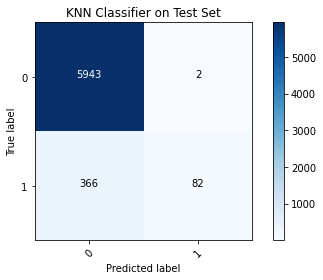

In [57]:
knn = KNN_DM()
model = knn.fit(X_train, y_train, optim=False)
y_pred = model.predict(X_test.toarray(), y_test)
report, accuracy, recall, precision, f1 = model.evaluate()

method = "only tokenization"
results_tf.append({
                'method':"tokenization",
                'accuracy': accuracy,
                "recall": recall,
                "precision": precision,
                "f1": f1
            }) #, ignore_index=True
print()

----------------------------------------------------------------------------------------------------



function: 'fit' finished in 23.31 seconds.
----------------------------------------------------------------------------------------------------


head of y_pred is 	[0 0 0 0 0 0]: 
f1-score:         	0.5113777410012412 
accuracy-score:   	95.38112558175916 
precision-score:  	0.9919743178170144 
recall-score:     	0.34448160535117056 

function: 'predict' finished in 457.06 seconds.
----------------------------------------------------------------------------------------------------


f1-score:         	0.5113777410012412 
accuracy-score:   	95.38112558175916 
precision-score:  	0.9919743178170144 
recall-score:     	0.34448160535117056 

----------------------------------------------------------------------------------------------------


,precision,recall,f1-score,support
0,0.952858,0.999790,0.975760,23775.000000
1,0.991974,0.344482,0.511378,1794.000000
accuracy,0.953811,0.953811,0.953811,0.953811
macro avg,0.972416,0.672136,0.743569,25569.000000
weighted avg,0.955603,0.953811,0.943177,25569.000000



function: 'print_report' finished in 0.21 seconds.
----------------------------------------------------------------------------------------------------


Start plotting the confusion matrix...

function: '__plot_confusion_matrix' finished in 0.29 seconds.
function: 'evaluate' finished in 0.57 seconds.



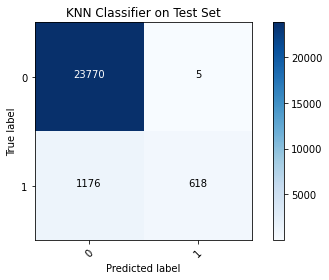

In [23]:
knn = KNN_DM()
model = knn.fit(X_train, y_train, optim=False)
y_pred = model.predict(X_train.toarray(), y_train)
report, accuracy, recall, precision, f1 = model.evaluate()

method = "only tokenization"
results_tf_train.append({
                'method':"tokenization",
                'accuracy': accuracy,
                "recall": recall,
                "precision": precision,
                "f1": f1
            }) #, ignore_index=True
print()

## 1.2 Using Count-Vectroizer

 ### classification, Evaluation & plotting with only tokenization

----------------------------------------------------------------------------------------------------



function: 'fit' finished in 0.01 seconds.
----------------------------------------------------------------------------------------------------


head of y_pred is 	[0 0 0 0 0 0]: 

function: 'predict' finished in 125.53 seconds.
----------------------------------------------------------------------------------------------------


f1-score:         	0.33271719038817005 
accuracy-score:   	94.35319881119975 
precision-score:  	0.967741935483871 
recall-score:     	0.20089285714285715 

----------------------------------------------------------------------------------------------------


,precision,recall,f1-score,support
0,0.943175,0.999495,0.970519,5945.000000
1,0.967742,0.200893,0.332717,448.000000
accuracy,0.943532,0.943532,0.943532,0.943532
macro avg,0.955458,0.600194,0.651618,6393.000000
weighted avg,0.944896,0.943532,0.925824,6393.000000



function: 'print_report' finished in 0.06 seconds.
----------------------------------------------------------------------------------------------------


Start plotting the confusion matrix...

function: '__plot_confusion_matrix' finished in 2.72 seconds.
function: 'evaluate' finished in 2.83 seconds.



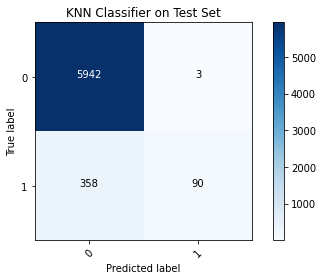

In [58]:
knn = KNN_DM()
model = knn.fit(X_train_c.toarray(), y_train, optim=False)
y_pred = model.predict(X_test_c.toarray(), y_test)
report, accuracy, recall, precision, f1 = model.evaluate()
results_cv.append({
                'method':"tokenization",
                'accuracy': accuracy,
                "recall": recall,
                "precision": precision,
                "f1": f1
            })
print()

# 2 with only Removing Stopwords <a class="anchor" id="stopwords_removal"></a>

### vectorize with tfidf countvectorizer
   

In [59]:
X_train, X_test, y_train, y_test = featureize(rem_stop=True,
                                              do_stem=False,
                                              do_lem=False, 
                                              split=True,
                                              upsample=False,
                                              do_emojis=False)

X_train, X_test, X_train_c, X_test_c = convert_to_tf_idf(X_train, X_test); X_train

2022-05-22 12:02:43,664 WARNING Using custom data configuration default
2022-05-22 12:02:43,679 WARNING Reusing dataset tweets_hate_speech_detection (C:\Users\D073999\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)


  0%|          | 0/1 [00:00<?, ?it/s]

X_train: 25569, X_test: 6393
(25569, 37433)
(25569, 37433)
(6393, 37433)
(6393, 37433)


<25569x37433 sparse matrix of type '<class 'numpy.float64'>'
	with 188772 stored elements in Compressed Sparse Row format>

## 2.1 Using TF-IDF

###  classification, Evaluation & plotting with only tokenization

----------------------------------------------------------------------------------------------------



function: 'fit' finished in 5.16 seconds.
----------------------------------------------------------------------------------------------------


head of y_pred is 	[0 0 0 0 0 0]: 

function: 'predict' finished in 94.25 seconds.
----------------------------------------------------------------------------------------------------


f1-score:         	0.30769230769230765 
accuracy-score:   	94.22806194274989 
precision-score:  	0.9647058823529412 
recall-score:     	0.18303571428571427 

----------------------------------------------------------------------------------------------------


,precision,recall,f1-score,support
0,0.941978,0.999495,0.969885,5945.000000
1,0.964706,0.183036,0.307692,448.000000
accuracy,0.942281,0.942281,0.942281,0.942281
macro avg,0.953342,0.591266,0.638789,6393.000000
weighted avg,0.943571,0.942281,0.923481,6393.000000



function: 'print_report' finished in 0.02 seconds.
----------------------------------------------------------------------------------------------------


Start plotting the confusion matrix...

function: '__plot_confusion_matrix' finished in 0.08 seconds.
function: 'evaluate' finished in 0.12 seconds.



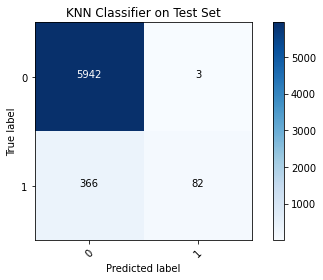

In [60]:
knn = KNN_DM()
model = knn.fit(X_train.toarray(), y_train, optim=False)
y_pred = model.predict(X_test.toarray(), y_test)
report, accuracy, recall, precision, f1 = model.evaluate()
results_tf.append({
                'method':"Stopwords removal",
                'accuracy': accuracy,
                "recall": recall,
                "precision": precision,
                "f1": f1
            })
print()

## 2.2 Using Count-Vectroizer

###  classification, Evaluation & plotting with only tokenization

----------------------------------------------------------------------------------------------------



function: 'fit' finished in 0.0 seconds.
----------------------------------------------------------------------------------------------------


head of y_pred is 	[0 0 0 0 0 0]: 

function: 'predict' finished in 127.16 seconds.
----------------------------------------------------------------------------------------------------


f1-score:         	0.33149171270718236 
accuracy-score:   	94.32191459408729 
precision-score:  	0.9473684210526315 
recall-score:     	0.20089285714285715 

----------------------------------------------------------------------------------------------------


,precision,recall,f1-score,support
0,0.943157,0.999159,0.970350,5945.000000
1,0.947368,0.200893,0.331492,448.000000
accuracy,0.943219,0.943219,0.943219,0.943219
macro avg,0.945262,0.600026,0.650921,6393.000000
weighted avg,0.943452,0.943219,0.925581,6393.000000



function: 'print_report' finished in 0.07 seconds.
----------------------------------------------------------------------------------------------------


Start plotting the confusion matrix...

function: '__plot_confusion_matrix' finished in 0.25 seconds.
function: 'evaluate' finished in 0.37 seconds.



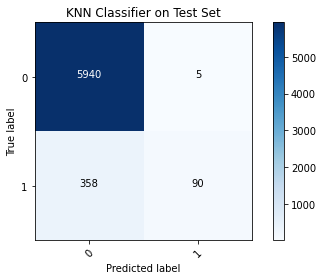

In [61]:
knn = KNN_DM()
model = knn.fit(X_train_c.toarray(), y_train, optim=False)
y_pred = model.predict(X_test_c.toarray(), y_test)
report, accuracy, recall, precision, f1 = model.evaluate()
results_cv.append({
                'method':"Stopwords removal",
                'accuracy': accuracy,
                "recall": recall,
                "precision": precision,
                "f1": f1
            })
print()

# 3 with  Stemming <a class="anchor" id="stemming"></a>

### vectorize with tfidf countvectorizer

In [62]:
X_train, X_test, y_train, y_test = featureize(rem_stop=True,
                                              do_stem=True,
                                              do_lem=False, 
                                              split=True,
                                              upsample=False,
                                              do_emojis=False)

X_train, X_test, X_train_c, X_test_c = convert_to_tf_idf(X_train, X_test); X_train

2022-05-22 12:07:34,190 WARNING Using custom data configuration default
2022-05-22 12:07:34,219 WARNING Reusing dataset tweets_hate_speech_detection (C:\Users\D073999\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)


  0%|          | 0/1 [00:00<?, ?it/s]

X_train: 25569, X_test: 6393
(25569, 32129)
(25569, 32129)
(6393, 32129)
(6393, 32129)


<25569x32129 sparse matrix of type '<class 'numpy.float64'>'
	with 188128 stored elements in Compressed Sparse Row format>

## 3.1 Using TF-IDF

###  classification, Evaluation & plotting with only tokenization

----------------------------------------------------------------------------------------------------



function: 'fit' finished in 5.49 seconds.
----------------------------------------------------------------------------------------------------


head of y_pred is 	[0 0 0 0 0 0]: 

function: 'predict' finished in 87.56 seconds.
----------------------------------------------------------------------------------------------------


f1-score:         	0.3108614232209738 
accuracy-score:   	94.24370405130612 
precision-score:  	0.9651162790697675 
recall-score:     	0.18526785714285715 

----------------------------------------------------------------------------------------------------


,precision,recall,f1-score,support
0,0.942128,0.999495,0.969964,5945.000000
1,0.965116,0.185268,0.310861,448.000000
accuracy,0.942437,0.942437,0.942437,0.942437
macro avg,0.953622,0.592382,0.640413,6393.000000
weighted avg,0.943739,0.942437,0.923776,6393.000000



function: 'print_report' finished in 0.03 seconds.
----------------------------------------------------------------------------------------------------


Start plotting the confusion matrix...

function: '__plot_confusion_matrix' finished in 0.1 seconds.
function: 'evaluate' finished in 0.15 seconds.



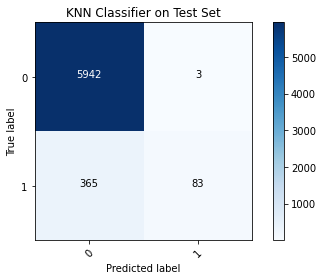

In [63]:
knn = KNN_DM()
model = knn.fit(X_train.toarray(), y_train, optim=False)
y_pred = model.predict(X_test.toarray(), y_test)
report, accuracy, recall, precision, f1 = model.evaluate()
results_tf.append({
                'method':"Stemming",
                'accuracy': accuracy,
                "recall": recall,
                "precision": precision,
                "f1": f1
            })
print()

## 3 .2 Using Count-Vectroizer

###  classification, Evaluation & plotting with only tokenization

----------------------------------------------------------------------------------------------------



function: 'fit' finished in 0.01 seconds.
----------------------------------------------------------------------------------------------------


head of y_pred is 	[0 0 0 0 0 0]: 

function: 'predict' finished in 116.75 seconds.
----------------------------------------------------------------------------------------------------


f1-score:         	0.3460837887067395 
accuracy-score:   	94.38448302831222 
precision-score:  	0.9405940594059405 
recall-score:     	0.21205357142857142 

----------------------------------------------------------------------------------------------------


,precision,recall,f1-score,support
0,0.943897,0.998991,0.970663,5945.000000
1,0.940594,0.212054,0.346084,448.000000
accuracy,0.943845,0.943845,0.943845,0.943845
macro avg,0.942246,0.605522,0.658373,6393.000000
weighted avg,0.943666,0.943845,0.926894,6393.000000



function: 'print_report' finished in 0.06 seconds.
----------------------------------------------------------------------------------------------------


Start plotting the confusion matrix...

function: '__plot_confusion_matrix' finished in 0.21 seconds.
function: 'evaluate' finished in 0.31 seconds.



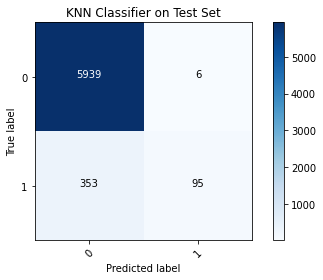

In [64]:
knn = KNN_DM()
model = knn.fit(X_train_c.toarray(), y_train, optim=False)
y_pred = model.predict(X_test_c.toarray(), y_test)
report, accuracy, recall, precision, f1 = model.evaluate()
results_cv.append({
                'method':"Stemming",
                'accuracy': accuracy,
                "recall": recall,
                "precision": precision,
                "f1": f1
            })
print()

# 4 with Lemmatization <a class="anchor" id="lemmatization"></a>

In [65]:

X_train, X_test, y_train, y_test = featureize(rem_stop=True,
                                              do_stem=False,
                                              do_lem=True, 
                                              split=True,
                                              upsample=False,
                                              do_emojis=False)
#vectorize
X_train, X_test, X_train_c, X_test_c = convert_to_tf_idf(X_train, X_test); X_train

2022-05-22 12:12:26,746 WARNING Using custom data configuration default
2022-05-22 12:12:26,762 WARNING Reusing dataset tweets_hate_speech_detection (C:\Users\D073999\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)


  0%|          | 0/1 [00:00<?, ?it/s]

X_train: 25569, X_test: 6393
(25569, 35354)
(25569, 35354)
(6393, 35354)
(6393, 35354)


<25569x35354 sparse matrix of type '<class 'numpy.float64'>'
	with 187357 stored elements in Compressed Sparse Row format>

## 4.1 Using TF-IDF

###  classification, Evaluation & plotting with only tokenization

----------------------------------------------------------------------------------------------------



function: 'fit' finished in 4.76 seconds.
----------------------------------------------------------------------------------------------------


head of y_pred is 	[0 0 0 0 0 0]: 

function: 'predict' finished in 88.27 seconds.
----------------------------------------------------------------------------------------------------


f1-score:         	0.3146067415730337 
accuracy-score:   	94.27498826841858 
precision-score:  	0.9767441860465116 
recall-score:     	0.1875 

----------------------------------------------------------------------------------------------------


,precision,recall,f1-score,support
0,0.942286,0.999664,0.970127,5945.00000
1,0.976744,0.187500,0.314607,448.00000
accuracy,0.942750,0.942750,0.942750,0.94275
macro avg,0.959515,0.593582,0.642367,6393.00000
weighted avg,0.944701,0.942750,0.924191,6393.00000



function: 'print_report' finished in 0.02 seconds.
----------------------------------------------------------------------------------------------------


Start plotting the confusion matrix...

function: '__plot_confusion_matrix' finished in 0.09 seconds.
function: 'evaluate' finished in 0.13 seconds.



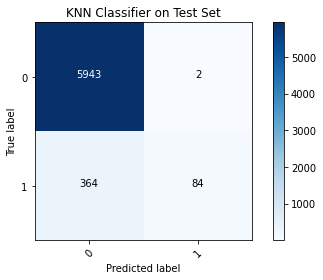

In [66]:
knn = KNN_DM()
model = knn.fit(X_train.toarray(), y_train, optim=False)
y_pred = model.predict(X_test.toarray(), y_test)
report, accuracy, recall, precision, f1 = model.evaluate()
results_tf.append({
                'method':"lemmitization",
                'accuracy': accuracy,
                "recall": recall,
                "precision": precision,
                "f1": f1
            })
print()

## 4 .2 Using Count-Vectroizer

###  classification, Evaluation & plotting with only tokenization

----------------------------------------------------------------------------------------------------



function: 'fit' finished in 0.01 seconds.
----------------------------------------------------------------------------------------------------


head of y_pred is 	[0 0 0 0 0 0]: 

function: 'predict' finished in 134.6 seconds.
----------------------------------------------------------------------------------------------------


f1-score:         	0.3387978142076503 
accuracy-score:   	94.32191459408729 
precision-score:  	0.9207920792079208 
recall-score:     	0.20758928571428573 

----------------------------------------------------------------------------------------------------


,precision,recall,f1-score,support
0,0.943579,0.998654,0.970336,5945.000000
1,0.920792,0.207589,0.338798,448.000000
accuracy,0.943219,0.943219,0.943219,0.943219
macro avg,0.932186,0.603122,0.654567,6393.000000
weighted avg,0.941982,0.943219,0.926080,6393.000000



function: 'print_report' finished in 0.06 seconds.
----------------------------------------------------------------------------------------------------


Start plotting the confusion matrix...

function: '__plot_confusion_matrix' finished in 0.21 seconds.
function: 'evaluate' finished in 0.33 seconds.



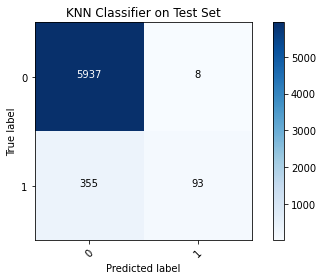

In [67]:
knn = KNN_DM()
model = knn.fit(X_train_c.toarray(), y_train, optim=False)
y_pred = model.predict(X_test_c.toarray(), y_test)
report, accuracy, recall, precision, f1 = model.evaluate()
results_cv.append({
                'method':"lemmitization",
                'accuracy': accuracy,
                "recall": recall,
                "precision": precision,
                "f1": f1
            })
print()

# 5 with Upsampling <a class="anchor" id="upsampling"></a>

In [68]:
# best results were achieved after the stemming/lemma and count_vectorizer therefore this will be upsampled
X_train, X_test, y_train, y_test = featureize(rem_stop=True,
                                              do_stem=True,
                                              do_lem=False, 
                                              split=True,
                                              upsample=True,
                                              do_emojis=False)

2022-05-22 12:17:23,116 WARNING Using custom data configuration default
2022-05-22 12:17:23,132 WARNING Reusing dataset tweets_hate_speech_detection (C:\Users\D073999\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)


  0%|          | 0/1 [00:00<?, ?it/s]

X_train: 25569, X_test: 6393


### vectorize with tfidf countvectorizer

In [69]:
X_train, X_test, X_train_c, X_test_c = convert_to_tf_idf(X_train, X_test); X_train

(25569, 32129)
(25569, 32129)
(6393, 32129)
(6393, 32129)


<25569x32129 sparse matrix of type '<class 'numpy.float64'>'
	with 188128 stored elements in Compressed Sparse Row format>

## 5.1 Using TF-IDF

###  classification, Evaluation & plotting with only tokenization

----------------------------------------------------------------------------------------------------



function: 'fit' finished in 4.76 seconds.
----------------------------------------------------------------------------------------------------


head of y_pred is 	[0 0 0 0 0 0]: 

function: 'predict' finished in 81.94 seconds.
----------------------------------------------------------------------------------------------------


f1-score:         	0.3108614232209738 
accuracy-score:   	94.24370405130612 
precision-score:  	0.9651162790697675 
recall-score:     	0.18526785714285715 

----------------------------------------------------------------------------------------------------


,precision,recall,f1-score,support
0,0.942128,0.999495,0.969964,5945.000000
1,0.965116,0.185268,0.310861,448.000000
accuracy,0.942437,0.942437,0.942437,0.942437
macro avg,0.953622,0.592382,0.640413,6393.000000
weighted avg,0.943739,0.942437,0.923776,6393.000000



function: 'print_report' finished in 0.03 seconds.
----------------------------------------------------------------------------------------------------


Start plotting the confusion matrix...

function: '__plot_confusion_matrix' finished in 0.1 seconds.
function: 'evaluate' finished in 0.14 seconds.



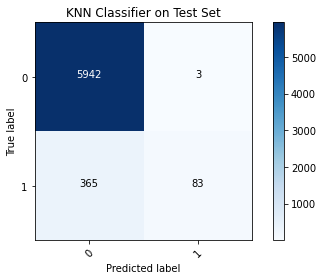

In [70]:
knn = KNN_DM()
model = knn.fit(X_train.toarray(), y_train, optim=False)
y_pred = model.predict(X_test.toarray(), y_test)
report, accuracy, recall, precision, f1 = model.evaluate()
results_tf.append({
                'method':"Upsampling",
                'accuracy': accuracy,
                "recall": recall,
                "precision": precision,
                "f1": f1
            })
print()

## 5 .2 Using Count-Vectroizer

###  classification, Evaluation & plotting with only tokenization

----------------------------------------------------------------------------------------------------



function: 'fit' finished in 0.0 seconds.
----------------------------------------------------------------------------------------------------


head of y_pred is 	[0 0 0 0 0 0]: 

function: 'predict' finished in 111.77 seconds.
----------------------------------------------------------------------------------------------------


f1-score:         	0.3460837887067395 
accuracy-score:   	94.38448302831222 
precision-score:  	0.9405940594059405 
recall-score:     	0.21205357142857142 

----------------------------------------------------------------------------------------------------


,precision,recall,f1-score,support
0,0.943897,0.998991,0.970663,5945.000000
1,0.940594,0.212054,0.346084,448.000000
accuracy,0.943845,0.943845,0.943845,0.943845
macro avg,0.942246,0.605522,0.658373,6393.000000
weighted avg,0.943666,0.943845,0.926894,6393.000000



function: 'print_report' finished in 0.07 seconds.
----------------------------------------------------------------------------------------------------


Start plotting the confusion matrix...

function: '__plot_confusion_matrix' finished in 0.27 seconds.
function: 'evaluate' finished in 0.4 seconds.



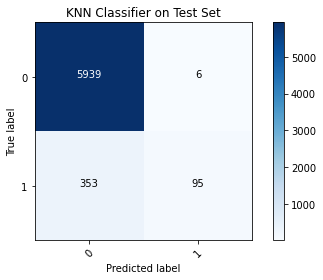

In [71]:
knn = KNN_DM()
model = knn.fit(X_train_c.toarray(), y_train, optim=False)
y_pred = model.predict(X_test_c.toarray(), y_test)
report, accuracy, recall, precision, f1 = model.evaluate()
results_cv.append({
                'method':"Upsampling",
                'accuracy': accuracy,
                "recall": recall,
                "precision": precision,
                "f1": f1
            })
print()

# 6 All_but_setemming <a class="anchor" id="All_but_stemming"></a>

In [72]:
# best results were achieved after the stemming/lemma and count_vectorizer therefore this will be upsampled
X_train, X_test, y_train, y_test = featureize(rem_stop=True,
                                              do_stem=False,
                                              do_lem=False, 
                                              split=True,
                                              upsample=True,
                                              do_emojis=True)
X_train, X_test, X_train_c, X_test_c = convert_to_tf_idf(X_train, X_test); X_train

2022-05-22 12:22:00,545 WARNING Using custom data configuration default
2022-05-22 12:22:00,562 WARNING Reusing dataset tweets_hate_speech_detection (C:\Users\D073999\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)


  0%|          | 0/1 [00:00<?, ?it/s]

X_train: 25569, X_test: 6393
(25569, 37433)
(25569, 37433)
(6393, 37433)
(6393, 37433)


<25569x37433 sparse matrix of type '<class 'numpy.float64'>'
	with 188772 stored elements in Compressed Sparse Row format>

## 6.1 Using TF-IDF

###  classification, Evaluation & plotting with only tokenization

----------------------------------------------------------------------------------------------------



function: 'fit' finished in 4.96 seconds.
----------------------------------------------------------------------------------------------------


head of y_pred is 	[0 0 0 0 0 0]: 

function: 'predict' finished in 91.74 seconds.
----------------------------------------------------------------------------------------------------


f1-score:         	0.30769230769230765 
accuracy-score:   	94.22806194274989 
precision-score:  	0.9647058823529412 
recall-score:     	0.18303571428571427 

----------------------------------------------------------------------------------------------------


,precision,recall,f1-score,support
0,0.941978,0.999495,0.969885,5945.000000
1,0.964706,0.183036,0.307692,448.000000
accuracy,0.942281,0.942281,0.942281,0.942281
macro avg,0.953342,0.591266,0.638789,6393.000000
weighted avg,0.943571,0.942281,0.923481,6393.000000



function: 'print_report' finished in 0.02 seconds.
----------------------------------------------------------------------------------------------------


Start plotting the confusion matrix...

function: '__plot_confusion_matrix' finished in 0.08 seconds.
function: 'evaluate' finished in 0.12 seconds.



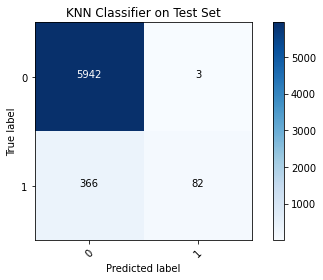

In [73]:
knn = KNN_DM()
model = knn.fit(X_train.toarray(), y_train, optim=False)
y_pred = model.predict(X_test.toarray(), y_test)
report, accuracy, recall, precision, f1 = model.evaluate()
results_tf.append({
                'method':"All_but_stemming",
                'accuracy': accuracy,
                "recall": recall,
                "precision": precision,
                "f1": f1
            })
print()

## 6 .2 Using Count-Vectroizer

###  classification, Evaluation & plotting with only tokenization

----------------------------------------------------------------------------------------------------



function: 'fit' finished in 7.73 seconds.
----------------------------------------------------------------------------------------------------


head of y_pred is 	[0 0 0 0 0 0]: 

function: 'predict' finished in 98.13 seconds.
----------------------------------------------------------------------------------------------------


f1-score:         	0.30769230769230765 
accuracy-score:   	94.22806194274989 
precision-score:  	0.9647058823529412 
recall-score:     	0.18303571428571427 

----------------------------------------------------------------------------------------------------


,precision,recall,f1-score,support
0,0.941978,0.999495,0.969885,5945.000000
1,0.964706,0.183036,0.307692,448.000000
accuracy,0.942281,0.942281,0.942281,0.942281
macro avg,0.953342,0.591266,0.638789,6393.000000
weighted avg,0.943571,0.942281,0.923481,6393.000000



function: 'print_report' finished in 0.04 seconds.
----------------------------------------------------------------------------------------------------


Start plotting the confusion matrix...

function: '__plot_confusion_matrix' finished in 0.12 seconds.
function: 'evaluate' finished in 0.18 seconds.



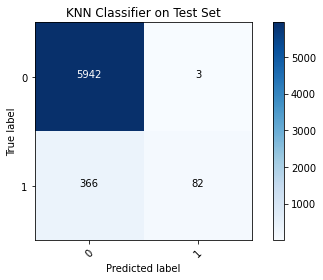

In [74]:
knn = KNN_DM()
model = knn.fit(X_train.toarray(), y_train, optim=False)
y_pred = model.predict(X_test.toarray(), y_test)
report, accuracy, recall, precision, f1 = model.evaluate()
results_cv.append({
                'method':"All_but_stemming",
                'accuracy': accuracy,
                "recall": recall,
                "precision": precision,
                "f1": f1
            })
print()

# Results <a class="anchor" id="results"></a>

In [75]:
results_tf = pd.DataFrame(results_tf)
results_cv = pd.DataFrame(results_cv)

In [76]:
display(HTML("<h2> Results using TF-IDF</h2>"))
display(results_tf)
print()
display(HTML("<h2> Results using Countervectorizer</h2>"))
display(results_cv)

,method,accuracy,recall,precision,f1
0,tokenization,94.243704,0.183036,0.976190,0.308271
1,Stopwords removal,94.228062,0.183036,0.964706,0.307692
2,Stemming,94.243704,0.185268,0.965116,0.310861
3,lemmitization,94.274988,0.187500,0.976744,0.314607
4,Upsampling,94.243704,0.185268,0.965116,0.310861
5,All_but_stemming,94.228062,0.183036,0.964706,0.307692


,method,accuracy,recall,precision,f1
0,tokenization,94.353199,0.200893,0.967742,0.332717
1,Stopwords removal,94.321915,0.200893,0.947368,0.331492
2,Stemming,94.384483,0.212054,0.940594,0.346084
3,lemmitization,94.321915,0.207589,0.920792,0.338798
4,Upsampling,94.384483,0.212054,0.940594,0.346084
5,All_but_stemming,94.228062,0.183036,0.964706,0.307692


2022-05-22 12:47:56,205 WARNING Using custom data configuration default
2022-05-22 12:47:56,212 WARNING Reusing dataset tweets_hate_speech_detection (C:\Users\D073999\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)


  0%|          | 0/1 [00:00<?, ?it/s]

X_train: 25569, X_test: 6393
(25569, 32129)
(25569, 32129)
(6393, 32129)
(6393, 32129)
----------------------------------------------------------------------------------------------------



function: 'fit' finished in 9.98 seconds.
----------------------------------------------------------------------------------------------------


head of y_pred is 	[0 0 0 0 0 0]: 
f1-score:         	0.5181219110378913 
accuracy-score:   	95.42414642731433 
precision-score:  	0.9921135646687698 
recall-score:     	0.35061315496098105 

function: 'predict' finished in 354.7 seconds.
----------------------------------------------------------------------------------------------------


f1-score:         	0.5181219110378913 
accuracy-score:   	95.42414642731433 
precision-score:  	0.9921135646687698 
recall-score:     	0.35061315496098105 

----------------------------------------------------------------------------------------------------


,precision,recall,f1-score,support
0,0.953279,0.999790,0.975980,23775.000000
1,0.992114,0.350613,0.518122,1794.000000
accuracy,0.954241,0.954241,0.954241,0.954241
macro avg,0.972696,0.675201,0.747051,25569.000000
weighted avg,0.956003,0.954241,0.943856,25569.000000



function: 'print_report' finished in 0.16 seconds.
----------------------------------------------------------------------------------------------------


Start plotting the confusion matrix...

function: '__plot_confusion_matrix' finished in 0.34 seconds.
function: 'evaluate' finished in 0.57 seconds.



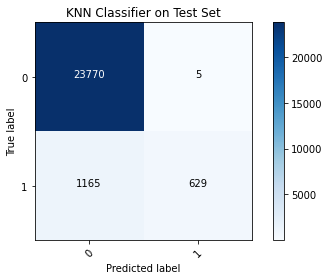

In [83]:
# best results were achieved after the stemming/lemma and upsampling and counvectorizer
#check train and test error
X_train, X_test, y_train, y_test = featureize(rem_stop=True,
                                              do_stem=True,
                                              do_lem=False, 
                                              split=True,
                                              upsample=True,
                                              do_emojis=False)
X_train, X_test, X_train_c, X_test_c = convert_to_tf_idf(X_train, X_test); X_train
knn = KNN_DM()
model = knn.fit(X_train.toarray(), y_train, optim=False)
y_pred = model.predict(X_train.toarray(), y_train)
report, accuracy, recall, precision, f1 = model.evaluate()
print()

# Hyperparameter optimization <a class="anchor" id="tunning"></a>

In [95]:
#switch to the original knn, because some metric are not included in knn_dm e.x p
knn = KNeighborsClassifier()

In [96]:

param_grid = [
  {'n_neighbors': [2,3,5,10,30], 'weights': ['uniform','distance'], 'algorithm':['ball_tree','kd_tree'], 'p':[1,2,5]},
  {'n_neighbors': [2,3,5,10,30], 'weights': ['uniform','distance'], 'algorithm':['brute'], 'p':[1,2,5]},
 ]

# Specify the cross validation
stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create the grid search instance
grid_search_estimator = GridSearchCV(knn, param_grid, scoring='f1_macro', cv=stratified_10_fold_cv, n_jobs = -1, verbose = 2, return_train_score=False)

# Run the grid search
grid_search_estimator.fit(X_train_c, y_train)

# Print the results of all hyper-parameter combinations
results = pd.DataFrame(grid_search_estimator.cv_results_)
display(results)
    
# Print the best parameter setting
print("best score is {} with params {}".format(grid_search_estimator.best_score_, grid_search_estimator.best_params_))

Fitting 10 folds for each of 90 candidates, totalling 900 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_p,param_weights,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.057900,0.065501,8.318176,0.455068,ball_tree,2,1,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 2, '...",0.614845,...,0.671316,0.643981,0.635034,0.646281,0.635848,0.635848,0.663674,0.640191,0.016227,31
1,0.058199,0.032361,9.119041,0.615112,ball_tree,2,1,distance,"{'algorithm': 'ball_tree', 'n_neighbors': 2, '...",0.719129,...,0.749564,0.727706,0.717006,0.745050,0.747291,0.691083,0.772143,0.731490,0.021481,4
2,0.046799,0.034180,3.484859,0.393268,ball_tree,2,2,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 2, '...",0.623364,...,0.676896,0.660719,0.643136,0.646281,0.643136,0.639933,0.667509,0.648860,0.015555,25
3,0.042099,0.019036,3.525557,0.379054,ball_tree,2,2,distance,"{'algorithm': 'ball_tree', 'n_neighbors': 2, '...",0.717006,...,0.763250,0.731928,0.717106,0.735747,0.746922,0.697766,0.763857,0.733416,0.019890,1
4,0.119299,0.147243,0.000000,0.000000,ball_tree,2,5,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 2, '...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.007801,0.003092,8.663470,0.392306,brute,30,1,distance,"{'algorithm': 'brute', 'n_neighbors': 30, 'p':...",0.597982,...,0.632529,0.652847,0.619124,0.627564,0.623364,0.614845,0.636662,0.621397,0.016727,40
86,0.013300,0.004797,3.765271,0.228174,brute,30,2,uniform,"{'algorithm': 'brute', 'n_neighbors': 30, 'p':...",0.530259,...,0.570265,0.574999,0.540427,0.550389,0.550389,0.529903,0.560646,0.549336,0.016575,58
87,0.013800,0.006523,3.543843,0.420425,brute,30,2,distance,"{'algorithm': 'brute', 'n_neighbors': 30, 'p':...",0.597982,...,0.636668,0.644832,0.619124,0.619124,0.610525,0.601082,0.636662,0.617072,0.016735,46
88,0.010198,0.002137,0.000000,0.000000,brute,30,5,uniform,"{'algorithm': 'brute', 'n_neighbors': 30, 'p':...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77


best score is 0.7334156145167383 with params {'algorithm': 'ball_tree', 'n_neighbors': 2, 'p': 2, 'weights': 'distance'}


In [100]:
knn = KNeighborsClassifier(algorithm='ball_tree', n_neighbors= 2, p=2, weights='distance')
model = knn.fit(X_train_c, y_train)

y_pred = model.predict(X_test_c.toarray())
report = classification_report(y_test, y_pred, output_dict=True)
report = pd.DataFrame(report).transpose()
display(report)

,precision,recall,f1-score,support
0,0.954707,0.996299,0.975060,5945.000000
1,0.883598,0.372768,0.524333,448.000000
accuracy,0.952604,0.952604,0.952604,0.952604
macro avg,0.919152,0.684534,0.749696,6393.000000
weighted avg,0.949724,0.952604,0.943474,6393.000000


In [101]:
f1 = f1_score(y_test, y_pred);f1

0.5243328100470959

the best score achieved after hyperparameter optimization

### choose value of k

this step was done before grid search above.

In [133]:
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn, X_train_c, y_train,cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

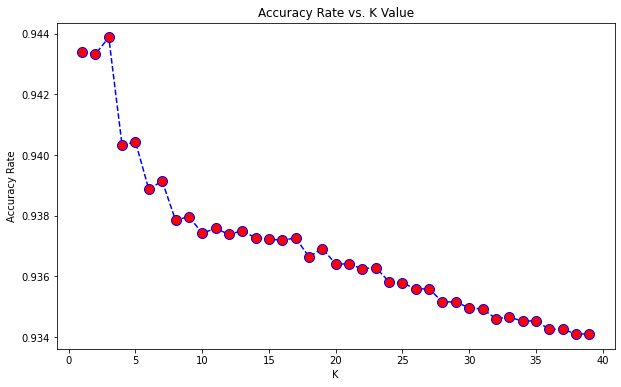

In [138]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

One can see, that is the accuracy is very high, between 2 and 5, wheras it reaches the peak at around 3, after 20 
the accuracy keeps dropping down

# Impalanced classes <a class="anchor" id="imbalanced"></a>

F1-score is very low, 
try to find tech. that specifically target the f-1 (like ensambles targets  overfitting).
the idea is rather to deal with imbalanced classes and not directly the f1-score, but as a result of handling the 
imbalance state in the right way, the f1-score should also be boosted:

1- use Ensembles or balanced-bagging-classifier: this is a rather simple solution and redandant, it is a normal classifier
but it will resample the data without having to use a sampler, so the results should be the same as if one resampled and then used another normal classifier

2- Resampling like resample from sklearn: already used above

3- SMOTE Synthetic Minority Oversampling Technique: oversampling the minor class by creating synthetic examples
    form original data and not only deleting or duplicating the examples
    
4- Threshold moving: most of the learners in sklearn have predict_proba, which give a probabillity 

### balanced-bagging-classifier

In [139]:
from imblearn.ensemble import BalancedBaggingClassifier
# KNeighborsClassifier
# KNN_DM is just a convient way to reuse the code, it will not work on all cases, because, 
#they are not covered during the impl.
# in this case we use the original classifier
X_train, X_test, y_train, y_test = featureize(rem_stop=True,
                                              do_stem=True,
                                              do_lem=False, 
                                              split=True,
                                              upsample=True,
                                              do_emojis=False)
X_train, X_test, X_train_c, X_test_c = convert_to_tf_idf(X_train, X_test); X_train
#Create an instance
classifier = BalancedBaggingClassifier(base_estimator=KNeighborsClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classifier.fit(X_train_c.toarray(), y_train)
preds = classifier.predict(X_test_c)

2022-05-22 17:10:11,005 WARNING Using custom data configuration default
2022-05-22 17:10:11,017 WARNING Reusing dataset tweets_hate_speech_detection (C:\Users\D073999\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)


  0%|          | 0/1 [00:00<?, ?it/s]

X_train: 25569, X_test: 6393
(25569, 32129)
(25569, 32129)
(6393, 32129)
(6393, 32129)


MemoryError: Unable to allocate 6.12 GiB for an array with shape (25569, 32129) and data type int64

### SMOTE

In [141]:
# SMOTE
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(X_train_c, y_train)
#oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
knn = KNN_DM()
model = knn.fit(oversampled_X.toarray(), oversampled_Y, optim=False)
y_pred = model.predict(X_test_c.toarray(), y_test)
report, accuracy, recall, precision, f1 = model.evaluate()
print()

MemoryError: Unable to allocate 11.4 GiB for an array with shape (47550, 32129) and data type int64

### Moving threshold 

In [143]:
# Moving threshold 
knn = KNeighborsClassifier()
knn.fit(X_train_c.toarray(),y_train, optim=False)
knn.predict_proba(X_test_c.toarray()) #probability of the class label predict_proba

MemoryError: Unable to allocate 6.12 GiB for an array with shape (25569, 32129) and data type int64

In [ ]:
from sklearn.metrics import roc_auc_score
step_factor = 0.05 
threshold_value = 0.2 
roc_score=0
predicted_proba = knn.predict_proba(X_test_c.toarray()) #probability of prediction
while threshold_value <=0.8: #continue to check best threshold upto probability 0.8
    temp_thresh = threshold_value
    predicted = (predicted_proba [:,1] >= temp_thresh).astype('int') #change the class boundary for prediction
    print('Threshold',temp_thresh,'--',roc_auc_score(y_test, predicted))
    if roc_score<roc_auc_score(y_test, predicted): #store the threshold for best classification
        roc_score = roc_auc_score(y_test, predicted)
        thrsh_score = threshold_value
    threshold_value = threshold_value + step_factor
print('---Optimum Threshold ---',thrsh_score,'--ROC--',roc_score)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_c.toarray(),y_train)
y_pred = knn.predict(X_test_c.toarray())  # default threshold is 0.5

y_pred = (knn.predict_proba(X_test.toarray())[:,1] >= 0.2).astype(bool) # set threshold as 0.2

In [ ]:
f1 = f1_score(y_test, y_pred);
print("f1 after changing the threshold: ", f1)

f1 after changing the threshold:  0.133422281521014


In [ ]:
from mlens.ensemble import SuperLearner
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

ensemble = SuperLearner(scorer=f1_score, verbose=0)
# Build the first layer
ensemble.add([KNeighborsClassifier(algorithm='ball_tree', metric='l1', n_neighbors=2), SVC(C=5)])

# Attach the final meta estimator
ensemble.add_meta(DecisionTreeClassifier())

# Fit ensemble
ensemble.fit(X_train_c.toarray(),y_train)

# Predict
preds = ensemble.predict(X_test_c)

print(classification_report(y_test,preds))
#print("Fit data:\n%r" % ensemble.data)
#print("Prediction score: %.3f" % accuracy_score(y_test, preds)) 

[MLENS] backend: threading
